# Create rv5_sqrt_38_crypto.csv

This notebook calculates realized volatility from 5-minute cryptocurrency data and creates a CSV file similar to rv5_sqrt_24.csv.

Steps:
1. Load the 5-minute cryptocurrency data
2. Calculate returns
3. Square the returns
4. Sum the squared returns for each day
5. Take the square root to get realized volatility
6. Save to CSV

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Set plotting style
plt.style.use('ggplot')
sns.set(style="darkgrid")
%matplotlib inline

In [3]:
# Check the structure of the original rv5_sqrt_24.csv file
original_rv5 = pd.read_csv('../../data/rv5_sqrt_24.csv', index_col=0)
print(f"Original rv5_sqrt_24.csv shape: {original_rv5.shape}")
print(f"Index type: {type(original_rv5.index)}")
print(f"First few rows:")
original_rv5.head()

Original rv5_sqrt_24.csv shape: (3421, 24)
Index type: <class 'pandas.core.indexes.base.Index'>
First few rows:


,.FCHI,.AEX,.BFX,.STOXX50E,.IBEX,.GDAXI,.AORD,.FTSE,.MXX,.IXIC,...,.BSESN,.NSEI,.KS11,.BVSP,.HSI,.KSE,.N225,.SSEC,.OSEAX,.GSPTSE
2002-05-08,0.008008,0.006511,0.005046,0.011304,0.008014,0.013358,0.004914,0.009943,0.008915,0.015574,...,0.005624,0.003161,0.011374,0.009699,0.009760,0.017131,0.016086,0.005982,0.006870,0.009644
2002-05-10,0.009415,0.009907,0.006757,0.010973,0.011931,0.013495,0.003942,0.007004,0.005377,0.016917,...,0.006140,0.002220,0.017261,0.014892,0.009324,0.011379,0.006362,0.004983,0.007896,0.003536
2002-05-13,0.010555,0.007797,0.005584,0.010599,0.012996,0.010621,0.004020,0.005421,0.005342,0.014373,...,0.004495,0.003763,0.013757,0.008635,0.009550,0.010933,0.006385,0.005364,0.006193,0.004813
2002-05-14,0.009960,0.009828,0.007538,0.010537,0.011149,0.011893,0.003565,0.007538,0.005699,0.011844,...,0.006404,0.005075,0.013905,0.013177,0.008162,0.007868,0.007801,0.006418,0.007693,0.004342
2002-05-15,0.010216,0.010049,0.007628,0.012232,0.012101,0.013103,0.008284,0.006574,0.005634,0.017249,...,0.008598,0.003431,0.009490,0.010792,0.007414,0.006237,0.013068,0.007366,0.006465,0.006262


In [4]:
# Load the 5-minute cryptocurrency data
crypto_file = '../../data/df_cl_5m.parquet'
print(f"Loading data from {crypto_file}...")

# Load just a sample first to check the structure
crypto_sample = pd.read_parquet(crypto_file, engine='pyarrow').head(1000)
print(f"Sample shape: {crypto_sample.shape}")
print(f"Index type: {type(crypto_sample.index)}")
print(f"Columns: {crypto_sample.columns.tolist()[:10]}...")
crypto_sample.head()

Loading data from ../../data/df_cl_5m.parquet...
Sample shape: (1000, 38)
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Columns: ['BTCUSDT', 'ETHUSDT', 'BCHUSDT', 'XRPUSDT', 'EOSUSDT', 'LTCUSDT', 'TRXUSDT', 'ETCUSDT', 'LINKUSDT', 'XLMUSDT']...


symbol,BTCUSDT,ETHUSDT,BCHUSDT,XRPUSDT,EOSUSDT,LTCUSDT,TRXUSDT,ETCUSDT,LINKUSDT,XLMUSDT,...,ZRXUSDT,COMPUSDT,DOGEUSDT,SXPUSDT,KAVAUSDT,BANDUSDT,RLCUSDT,MKRUSDT,SNXUSDT,DOTUSDT
Open Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00+00:00,7175.25,128.81,203.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:05:00+00:00,7186.69,128.87,204.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:10:00+00:00,7176.26,128.87,203.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:15:00+00:00,7173.68,128.82,203.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:20:00+00:00,7171.81,128.67,203.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Now load the full dataset
print(f"Loading full dataset...")
crypto_data = pd.read_parquet(crypto_file, engine='pyarrow')
print(f"Full data shape: {crypto_data.shape}")
print(f"Time range: {crypto_data.index.min()} to {crypto_data.index.max()}")

Loading full dataset...
Full data shape: (530678, 38)
Time range: 2020-01-01 00:00:00+00:00 to 2025-01-16 15:05:00+00:00


In [6]:
# Calculate returns (log differences)
print("Calculating returns...")
returns = np.log(crypto_data).diff().dropna()
print(f"Returns shape: {returns.shape}")
returns.head()

Calculating returns...
Returns shape: (463190, 38)


symbol,BTCUSDT,ETHUSDT,BCHUSDT,XRPUSDT,EOSUSDT,LTCUSDT,TRXUSDT,ETCUSDT,LINKUSDT,XLMUSDT,...,ZRXUSDT,COMPUSDT,DOGEUSDT,SXPUSDT,KAVAUSDT,BANDUSDT,RLCUSDT,MKRUSDT,SNXUSDT,DOTUSDT
Open Time,,,,,,,,,,,,,,,,,,,,,
2020-08-22 07:05:00+00:00,0.000227,-0.000435,-0.000562,0.003208,0.000609,0.002023,0.001223,0.000299,-0.000338,0.004179,...,-0.011083,0.000238,-0.000294,-0.014495,-0.000257,-0.003460,0.001088,0.000824,-0.002380,-0.020273
2020-08-22 07:10:00+00:00,0.000945,0.000691,0.000843,-0.000356,0.001521,0.001010,0.002848,0.000299,0.003573,0.002479,...,0.011870,0.001547,0.000589,0.012464,0.000051,-0.001456,-0.006341,-0.001132,-0.000917,-0.011911
2020-08-22 07:15:00+00:00,-0.001599,-0.003254,-0.000492,-0.002495,-0.003045,-0.003202,-0.004888,-0.003298,-0.009126,-0.005562,...,-0.014661,-0.002202,-0.003537,-0.013630,-0.015516,-0.008342,-0.009760,-0.001052,-0.004781,0.028414
2020-08-22 07:20:00+00:00,0.001440,0.001718,0.000421,0.001070,-0.000915,0.001181,-0.000408,0.001201,0.001086,0.000398,...,-0.010163,-0.005557,0.002654,-0.006709,0.001959,-0.007827,0.005510,-0.000049,0.005515,0.069308
2020-08-22 07:25:00+00:00,0.001267,0.000538,-0.000316,0.000713,0.001220,0.001348,0.002855,0.000600,0.001220,0.001095,...,0.010030,0.001975,0.000294,0.005815,0.009015,-0.000481,0.001304,0.001618,0.000733,-0.013602


In [7]:
# Square the returns
print("Squaring returns...")
squared_returns = returns ** 2
squared_returns.head()

Squaring returns...


symbol,BTCUSDT,ETHUSDT,BCHUSDT,XRPUSDT,EOSUSDT,LTCUSDT,TRXUSDT,ETCUSDT,LINKUSDT,XLMUSDT,...,ZRXUSDT,COMPUSDT,DOGEUSDT,SXPUSDT,KAVAUSDT,BANDUSDT,RLCUSDT,MKRUSDT,SNXUSDT,DOTUSDT
Open Time,,,,,,,,,,,,,,,,,,,,,
2020-08-22 07:05:00+00:00,5.151338e-08,1.893312e-07,3.159051e-07,1.029118e-05,3.711233e-07,0.000004,1.496320e-06,8.969478e-08,1.139726e-07,1.746497e-05,...,0.000123,5.675013e-08,8.663255e-08,0.000210,6.627878e-08,1.197328e-05,0.000001,6.794964e-07,5.663752e-06,0.000411
2020-08-22 07:10:00+00:00,8.938272e-07,4.774641e-07,7.105867e-07,1.266899e-07,2.314584e-06,0.000001,8.113526e-06,8.964108e-08,1.276459e-05,6.146924e-06,...,0.000141,2.393416e-06,3.464282e-07,0.000155,2.651697e-09,2.120337e-06,0.000040,1.280490e-06,8.406001e-07,0.000142
2020-08-22 07:15:00+00:00,2.555968e-06,1.059092e-05,2.417119e-07,6.225525e-06,9.272447e-06,0.000010,2.389248e-05,1.087914e-05,8.327827e-05,3.093797e-05,...,0.000215,4.850197e-06,1.250822e-05,0.000186,2.407542e-04,6.958318e-05,0.000095,1.106510e-06,2.285967e-05,0.000807
2020-08-22 07:20:00+00:00,2.074652e-06,2.952182e-06,1.775968e-07,1.145095e-06,8.378324e-07,0.000001,1.668014e-07,1.441586e-06,1.179231e-06,1.586644e-07,...,0.000103,3.088096e-05,7.042095e-06,0.000045,3.838754e-06,6.125907e-05,0.000030,2.359658e-09,3.041214e-05,0.004804
2020-08-22 07:25:00+00:00,1.605684e-06,2.893692e-07,9.988765e-08,5.080245e-07,1.489026e-06,0.000002,8.153290e-06,3.597482e-07,1.489026e-06,1.198110e-06,...,0.000101,3.902197e-06,8.668357e-08,0.000034,8.127514e-05,2.315427e-07,0.000002,2.617730e-06,5.372942e-07,0.000185


In [8]:
# Sum the squared returns for each day to get daily realized variance
print("Calculating daily realized variance...")
daily_rv = squared_returns.resample('D').sum()
print(f"Daily realized variance shape: {daily_rv.shape}")
daily_rv.head()

Calculating daily realized variance...
Daily realized variance shape: (1609, 38)


symbol,BTCUSDT,ETHUSDT,BCHUSDT,XRPUSDT,EOSUSDT,LTCUSDT,TRXUSDT,ETCUSDT,LINKUSDT,XLMUSDT,...,ZRXUSDT,COMPUSDT,DOGEUSDT,SXPUSDT,KAVAUSDT,BANDUSDT,RLCUSDT,MKRUSDT,SNXUSDT,DOTUSDT
Open Time,,,,,,,,,,,,,,,,,,,,,
2020-08-22 00:00:00+00:00,0.000141,0.000565,0.000477,0.000496,0.000903,0.000718,0.001879,0.000649,0.004233,0.000944,...,0.011006,0.005414,0.000789,0.010333,0.009934,0.014474,0.004980,0.004405,0.009144,0.055085
2020-08-23 00:00:00+00:00,0.000189,0.000817,0.000781,0.000674,0.001094,0.001460,0.002183,0.000655,0.005391,0.001079,...,0.012349,0.003866,0.000907,0.011131,0.008683,0.009262,0.006245,0.000853,0.005308,0.024525
2020-08-24 00:00:00+00:00,0.000163,0.000988,0.001135,0.000592,0.000997,0.001355,0.001579,0.000625,0.003015,0.001619,...,0.005157,0.004798,0.000996,0.011532,0.004645,0.003956,0.003274,0.003965,0.004097,0.016885
2020-08-25 00:00:00+00:00,0.000614,0.002243,0.001672,0.001129,0.003509,0.002263,0.003722,0.001369,0.006231,0.001951,...,0.008981,0.007370,0.001642,0.014746,0.006543,0.006140,0.011040,0.003411,0.010941,0.024981
2020-08-26 00:00:00+00:00,0.000419,0.001163,0.000997,0.000846,0.001115,0.000996,0.002042,0.000861,0.005658,0.001677,...,0.006650,0.005245,0.000782,0.009713,0.005682,0.015287,0.005713,0.001805,0.007646,0.022120


In [9]:
# Take the square root to get realized volatility
print("Calculating realized volatility...")
rv5_sqrt = daily_rv.apply(np.sqrt)
print(f"Realized volatility shape: {rv5_sqrt.shape}")
rv5_sqrt.head()

Calculating realized volatility...
Realized volatility shape: (1609, 38)


symbol,BTCUSDT,ETHUSDT,BCHUSDT,XRPUSDT,EOSUSDT,LTCUSDT,TRXUSDT,ETCUSDT,LINKUSDT,XLMUSDT,...,ZRXUSDT,COMPUSDT,DOGEUSDT,SXPUSDT,KAVAUSDT,BANDUSDT,RLCUSDT,MKRUSDT,SNXUSDT,DOTUSDT
Open Time,,,,,,,,,,,,,,,,,,,,,
2020-08-22 00:00:00+00:00,0.011886,0.023769,0.021839,0.022261,0.030054,0.026795,0.043344,0.025476,0.065064,0.030725,...,0.104907,0.073579,0.028096,0.101653,0.099668,0.120308,0.070566,0.066369,0.095626,0.234703
2020-08-23 00:00:00+00:00,0.013746,0.028576,0.027944,0.025955,0.033078,0.038205,0.046722,0.025600,0.073421,0.032842,...,0.111125,0.062179,0.030124,0.105501,0.093182,0.096238,0.079025,0.029208,0.072857,0.156604
2020-08-24 00:00:00+00:00,0.012763,0.031429,0.033683,0.024334,0.031568,0.036805,0.039735,0.025008,0.054906,0.040233,...,0.071815,0.069270,0.031560,0.107389,0.068157,0.062893,0.057219,0.062971,0.064007,0.129943
2020-08-25 00:00:00+00:00,0.024773,0.047357,0.040889,0.033598,0.059233,0.047575,0.061008,0.037005,0.078934,0.044167,...,0.094766,0.085846,0.040527,0.121433,0.080888,0.078357,0.105071,0.058401,0.104599,0.158054
2020-08-26 00:00:00+00:00,0.020466,0.034105,0.031575,0.029078,0.033384,0.031556,0.045191,0.029342,0.075222,0.040952,...,0.081550,0.072423,0.027962,0.098555,0.075377,0.123641,0.075583,0.042483,0.087442,0.148726


In [10]:
# Compare with the original rv5_sqrt_24.csv
print(f"Original rv5_sqrt_24.csv shape: {original_rv5.shape}")
print(f"New rv5_sqrt_38_crypto.csv shape: {rv5_sqrt.shape}")

# Check if the values are in the same range
print("\nOriginal rv5_sqrt_24.csv statistics:")
print(original_rv5.describe())

print("\nNew rv5_sqrt_38_crypto.csv statistics:")
print(rv5_sqrt.describe())

Original rv5_sqrt_24.csv shape: (3421, 24)
New rv5_sqrt_38_crypto.csv shape: (1609, 38)

Original rv5_sqrt_24.csv statistics:
             .FCHI         .AEX         .BFX    .STOXX50E        .IBEX  \
count  3421.000000  3421.000000  3421.000000  3421.000000  3421.000000   
mean      0.009593     0.008801     0.008156     0.010326     0.010252   
std       0.005410     0.005294     0.004455     0.006107     0.005571   
min       0.002226     0.001687     0.002231     0.002106     0.002814   
25%       0.005986     0.005395     0.005252     0.006372     0.006493   
50%       0.008164     0.007295     0.006966     0.008741     0.009060   
75%       0.011610     0.010535     0.009720     0.012353     0.012531   
max       0.055151     0.064810     0.049207     0.073517     0.074229   

            .GDAXI        .AORD        .FTSE         .MXX        .IXIC  ...  \
count  3421.000000  3421.000000  3421.000000  3421.000000  3421.000000  ...   
mean      0.010014     0.006039     0.008843     

In [11]:
# If the values are in different ranges, we may need to scale them
# Check if we need to multiply by 100 like in the original notebook
if rv5_sqrt.mean().mean() < original_rv5.mean().mean() / 10:
    print("Scaling realized volatility by 100...")
    rv5_sqrt = rv5_sqrt * 100
    print("\nScaled rv5_sqrt_38_crypto.csv statistics:")
    print(rv5_sqrt.describe())

In [13]:
# Save to CSV
output_file = '../../data/rv5_sqrt_38_crypto.csv'
print(f"Saving to {output_file}...")
rv5_sqrt.to_csv(output_file)
print(f"Done! Created {output_file} with shape {rv5_sqrt.shape}")

Saving to ../../data/rv5_sqrt_38_crypto.csv...
Done! Created ../../data/rv5_sqrt_38_crypto.csv with shape (1609, 38)


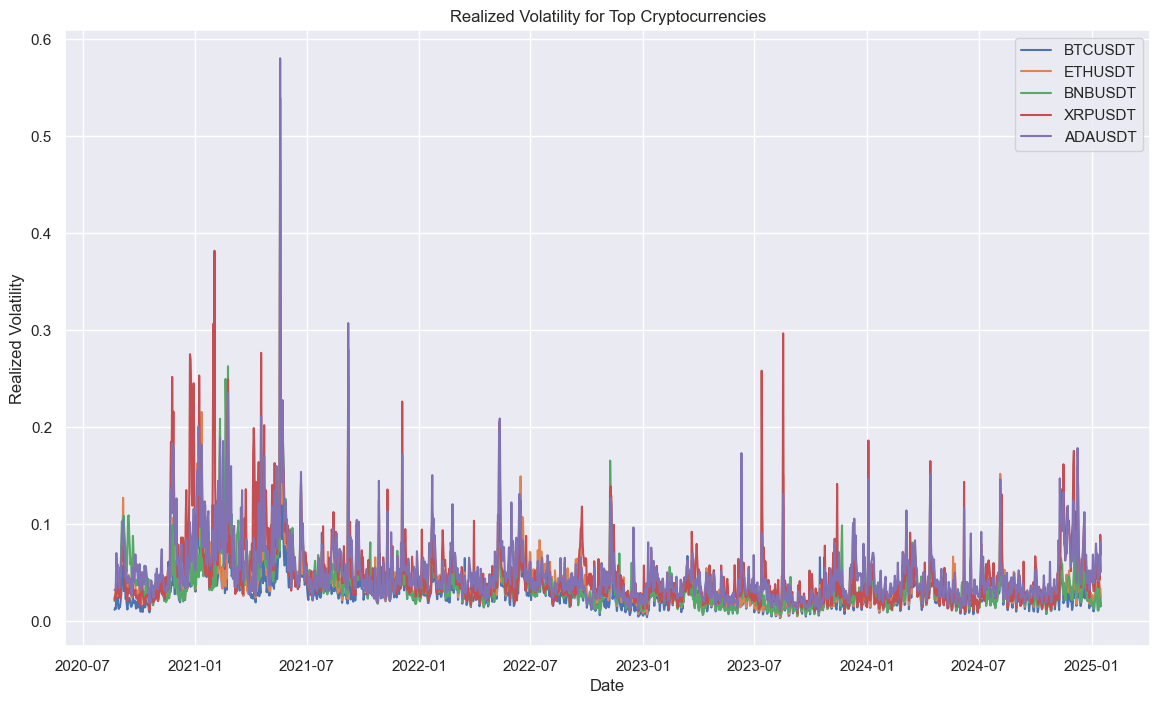

In [14]:
# Visualize the realized volatility for a few cryptocurrencies
top_cryptos = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'XRPUSDT', 'ADAUSDT']
top_cryptos = [crypto for crypto in top_cryptos if crypto in rv5_sqrt.columns]

plt.figure(figsize=(14, 8))
for crypto in top_cryptos:
    plt.plot(rv5_sqrt.index, rv5_sqrt[crypto], label=crypto)
plt.title('Realized Volatility for Top Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Realized Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# plot the realized volatility vs pct_change (rtn) for BTCUSDT
# BTCUSDT should be transformed from 5min to daily
pd.options.plotting.backend = "plotly"


btc_rtn_daily = crypto_data['BTCUSDT'].resample('D').last().pct_change().dropna()
fig = rv5_sqrt['BTCUSDT'].plot(title='Realized Volatility' )

fig.add_trace(btc_rtn_daily.plot(title='Returns').data[0])


# change the color of the second trace to red
fig.data[1].line.color = 'red'
fig.show()

## Summary

We have successfully created the `rv5_sqrt_38_crypto.csv` file with realized volatility calculated from 5-minute cryptocurrency data. This file can now be used in the GSPHAR model in the same way as the original `rv5_sqrt_24.csv` file.